In [72]:
import pandas as pd
import numpy as np
import math
from sklearn import decomposition
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
dta = pd.read_csv('CDS-all-tmp.csv')
dta.head()

,Unnamed: 0,Unnamed: 0.1,geneID,LocusTag,OldLocusTag,N2 12h A,N2 12h B,N2 22h A,N2 22h B,pmk-1 12h A,pmk-1 12h B,Plate 12h A,Plate 12h B,Plate 22h A,Plate 22h B,_merge
0,0,0.0,gene0,PA14_RS00005,PA14_00010,15.0,11.0,21.0,184.0,68.0,76.0,126.0,47.0,51.0,16.0,both
1,1,1.0,gene1,PA14_RS00010,PA14_00020,10.0,4.0,11.0,102.0,36.0,34.0,47.0,14.0,14.0,7.0,both
2,2,2.0,gene2,PA14_RS00015,PA14_00030;pseudo=true,4.0,8.0,13.0,66.0,34.0,19.0,89.0,80.0,57.0,54.0,both
3,3,4.0,gene4,PA14_RS00025,PA14_00060,5.0,0.0,1.0,17.0,12.0,2.0,13.0,7.0,3.0,2.0,both
4,4,5.0,gene5,PA14_RS00030,PA14_00070,2.0,1.0,5.0,24.0,8.0,6.0,12.0,6.0,13.0,1.0,both


In [3]:
del dta['Unnamed: 0']
del dta['Unnamed: 0.1']
dta.head()

,geneID,LocusTag,OldLocusTag,N2 12h A,N2 12h B,N2 22h A,N2 22h B,pmk-1 12h A,pmk-1 12h B,Plate 12h A,Plate 12h B,Plate 22h A,Plate 22h B,_merge
0,gene0,PA14_RS00005,PA14_00010,15.0,11.0,21.0,184.0,68.0,76.0,126.0,47.0,51.0,16.0,both
1,gene1,PA14_RS00010,PA14_00020,10.0,4.0,11.0,102.0,36.0,34.0,47.0,14.0,14.0,7.0,both
2,gene2,PA14_RS00015,PA14_00030;pseudo=true,4.0,8.0,13.0,66.0,34.0,19.0,89.0,80.0,57.0,54.0,both
3,gene4,PA14_RS00025,PA14_00060,5.0,0.0,1.0,17.0,12.0,2.0,13.0,7.0,3.0,2.0,both
4,gene5,PA14_RS00030,PA14_00070,2.0,1.0,5.0,24.0,8.0,6.0,12.0,6.0,13.0,1.0,both


In [4]:
def get_geo_mean(iterable):
    num_samples = len(iterable)
    a = np.array(iterable)
    b = a>0
    geo_mean = a[b].prod()**(1.0/num_samples)
    #print geo_mean
    return geo_mean

In [5]:
lst = [2,3,4,6,9,4,6,0]
print get_geo_mean(lst)

3.64419854514


In [6]:
def get_size_each(x, iterable):
    gm = get_geo_mean(iterable)
    size_each = x/gm
    return size_each

In [7]:
samples = ['N2 12h A', 'N2 12h B', 'N2 22h A', 'N2 22h B', 'pmk-1 12h A', 'pmk-1 12h B', 'Plate 12h A',
           'Plate 12h B', 'Plate 22h A', 'Plate 22h B']
sijs = {}
for smp in samples:
    dta['size_'+smp] = dta.apply(lambda row: get_size_each(row[smp],[row[s] for s in samples]), axis=1)
    sijs['sij-'+smp] = dta['size_'+smp].median()

In [8]:
print sijs

{'sij-pmk-1 12h B': 1.0970540416642134, 'sij-N2 22h A': 0.38684988320194397, 'sij-pmk-1 12h A': 0.9517515078593506, 'sij-N2 22h B': 2.408224685280692, 'sij-N2 12h A': 0.3701477767602066, 'sij-N2 12h B': 0.15279125813049055, 'sij-Plate 22h B': 1.001590259052052, 'sij-Plate 22h A': 1.062741597147487, 'sij-Plate 12h A': 1.9559997828528635, 'sij-Plate 12h B': 1.462268488679611}


In [9]:
dta.head()

,geneID,LocusTag,OldLocusTag,N2 12h A,N2 12h B,N2 22h A,N2 22h B,pmk-1 12h A,pmk-1 12h B,Plate 12h A,...,size_N2 12h A,size_N2 12h B,size_N2 22h A,size_N2 22h B,size_pmk-1 12h A,size_pmk-1 12h B,size_Plate 12h A,size_Plate 12h B,size_Plate 22h A,size_Plate 22h B
0,gene0,PA14_RS00005,PA14_00010,15.0,11.0,21.0,184.0,68.0,76.0,126.0,...,0.359659,0.263750,0.503523,4.411818,1.630455,1.822273,3.021136,1.126932,1.222841,0.383636
1,gene1,PA14_RS00010,PA14_00020,10.0,4.0,11.0,102.0,36.0,34.0,47.0,...,0.555996,0.222398,0.611595,5.671155,2.001584,1.890385,2.613179,0.778394,0.778394,0.389197
2,gene2,PA14_RS00015,PA14_00030;pseudo=true,4.0,8.0,13.0,66.0,34.0,19.0,89.0,...,0.139027,0.278053,0.451837,2.293940,1.181727,0.660377,3.093344,2.780534,1.981130,1.876860
3,gene4,PA14_RS00025,PA14_00060,5.0,0.0,1.0,17.0,12.0,2.0,13.0,...,1.242475,0.000000,0.248495,4.224416,2.981940,0.496990,3.230435,1.739465,0.745485,0.496990
4,gene5,PA14_RS00030,PA14_00070,2.0,1.0,5.0,24.0,8.0,6.0,12.0,...,0.396057,0.198028,0.990141,4.752678,1.584226,1.188170,2.376339,1.188170,2.574367,0.198028


In [18]:
for smp in samples:
    dta['norm-'+smp] = dta.apply(lambda row: row[smp]/sijs['sij-'+smp], axis=1)

In [19]:
dta.head()

,geneID,LocusTag,OldLocusTag,N2 12h A,N2 12h B,N2 22h A,N2 22h B,pmk-1 12h A,pmk-1 12h B,Plate 12h A,...,norm-N2 12h A,norm-N2 12h B,norm-N2 22h A,norm-N2 22h B,norm-pmk-1 12h A,norm-pmk-1 12h B,norm-Plate 12h A,norm-Plate 12h B,norm-Plate 22h A,norm-Plate 22h B
0,gene0,PA14_RS00005,PA14_00010,15.0,11.0,21.0,184.0,68.0,76.0,126.0,...,40.524355,71.993648,54.284623,76.404831,71.447221,69.276441,64.417185,32.141840,47.989088,15.974596
1,gene1,PA14_RS00010,PA14_00020,10.0,4.0,11.0,102.0,36.0,34.0,47.0,...,27.016237,26.179508,28.434802,42.354852,37.824999,30.992092,24.028633,9.574165,13.173475,6.988886
2,gene2,PA14_RS00015,PA14_00030;pseudo=true,4.0,8.0,13.0,66.0,34.0,19.0,89.0,...,10.806495,52.359016,33.604767,27.406081,35.723610,17.319110,45.501028,54.709515,53.634863,53.914262
3,gene4,PA14_RS00025,PA14_00060,5.0,0.0,1.0,17.0,12.0,2.0,13.0,...,13.508118,0.000000,2.584982,7.059142,12.608333,1.823064,6.646218,4.787083,2.822888,1.996825
4,gene5,PA14_RS00030,PA14_00070,2.0,1.0,5.0,24.0,8.0,6.0,12.0,...,5.403247,6.544877,12.924910,9.965848,8.405555,5.469193,6.134970,4.103214,12.232513,0.998412


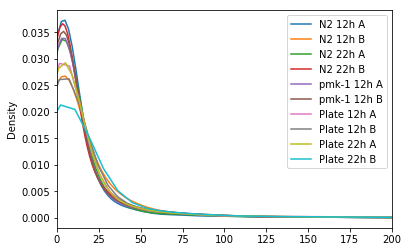

In [65]:
for smp in samples:
    dta['norm-'+smp].plot(kind='density', label=smp)
# ax = dta['norm-N2 22h B'].plot(kind='density')
plt.xlim((0,200))
plt.legend()

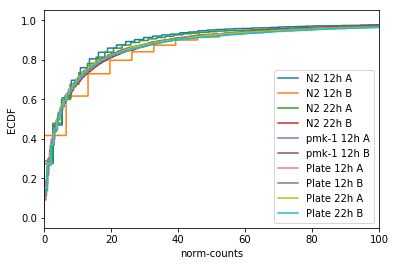

In [87]:
for smp in samples:
    sorted_ = np.sort(dta['norm-'+smp])
    yvals = np.arange(len(sorted_))/float(len(sorted_))
    plt.plot(sorted_, yvals, label=smp)
plt.xlim((0,100))
plt.legend()
plt.xlabel('norm-counts')
plt.ylabel('ECDF')

In [12]:
dta.tail()

,geneID,LocusTag,OldLocusTag,N2 12h A,N2 12h B,N2 22h A,N2 22h B,pmk-1 12h A,pmk-1 12h B,Plate 12h A,...,norm-N2 12h A,norm-N2 12h B,norm-N2 22h A,norm-N2 22h B,norm-pmk-1 12h A,norm-pmk-1 12h B,norm-Plate 12h A,norm-Plate 12h B,norm-Plate 22h A,norm-Plate 22h B
6093,gene5222,ychF,PA14_61820,7.0,8.0,11.0,39.0,19.0,13.0,28.0,...,18.911366,52.359016,28.434802,16.194502,19.963194,11.849918,14.314930,17.780592,7.527700,4.992061
6094,gene5407,yciH,PA14_64000,3.0,0.0,6.0,13.0,15.0,6.0,16.0,...,8.104871,0.000000,15.509892,5.398167,15.760416,5.469193,8.179960,2.735476,1.881925,1.996825
6095,gene2082,yegS,PA14_24970,1.0,2.0,5.0,19.0,12.0,19.0,12.0,...,2.701624,13.089754,12.924910,7.889629,12.608333,17.319110,6.134970,12.309641,8.468663,22.963482
6096,gene4345,ygbF,PA14_51690,15.0,2.0,10.0,87.0,37.0,29.0,57.0,...,40.524355,13.089754,25.849820,36.126197,38.875694,26.434432,29.141108,33.509578,31.992725,13.977772
6097,gene1920,zwf,PA14_23070,39.0,11.0,17.0,180.0,68.0,56.0,35.0,...,105.363324,71.993648,43.944695,74.743856,71.447221,51.045799,17.893663,51.290170,10.350588,31.949193


In [73]:
X = dta.iloc[:,24:30].values.transpose()
X_std = StandardScaler().fit_transform(X)

In [74]:
print X.shape
pca = decomposition.PCA(n_components=3)
pca_fit = pca.fit_transform(X_std)
pca_fit.shape

(6, 6098)


(6, 3)

In [30]:
dta.shape

(6098, 34)

In [75]:
pca_fit

array([[-26.56784761,  68.3691065 , -36.7971442 ],
       [ 99.47851355,   6.79999202,   0.75373491],
       [-23.45435967,  18.00527333,  69.24495494],
       [-14.81296978, -36.21723372, -16.98601593],
       [-15.29953739, -18.78789518,   1.53586519],
       [-19.34379911, -38.16924295, -17.75139491]])

In [76]:
print(pca.explained_variance_ratio_)

[ 0.33869422  0.23088291  0.19099399]


In [77]:
dta.iloc[:,24:30].columns

Index([u'norm-N2 12h A', u'norm-N2 12h B', u'norm-N2 22h A', u'norm-N2 22h B',
       u'norm-pmk-1 12h A', u'norm-pmk-1 12h B'],
      dtype='object')

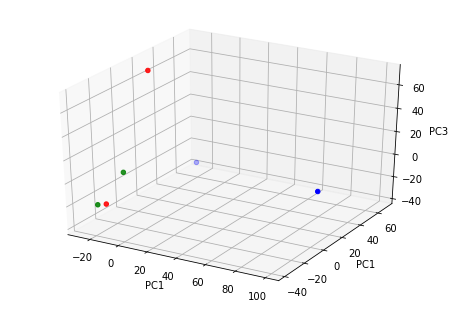

In [100]:
from mpl_toolkits.mplot3d import Axes3D
# plt.figure(figsize=(6, 4))
fig = plt.figure()
ax = Axes3D(fig)
# for lab, col in zip(('norm-N2 12h A', 'norm-N2 12h B', 'norm-N2 22h A', 'norm-N2 22h B', 'norm-pmk-1 12h A', 'norm-pmk-1 12h B'),
#                     ('blue', 'blue', 'red', 'red', 'green', 'green')):
#     plt.scatter(pca_fit[:,0],pca_fit[:,1],
#                 label=lab,
#                 c=col)
col = ['blue', 'blue', 'red', 'red', 'green', 'green']
ax.scatter(pca_fit[:,0],pca_fit[:,1], pca_fit[:,2], c=col, marker='o')
ax.set_xlabel('PC1')
ax.set_ylabel('PC1')
ax.set_zlabel('PC3')

In [89]:
pca.score_samples(X_std)

array([-24926.14155683, -24926.14074607, -24926.20610232, -24926.64511201,
       -24927.50598314, -24926.6929127 ])

In [102]:
cols = dta.iloc[:,24:30].columns
print cols

Index([u'norm-N2 12h A', u'norm-N2 12h B', u'norm-N2 22h A', u'norm-N2 22h B',
       u'norm-pmk-1 12h A', u'norm-pmk-1 12h B'],
      dtype='object')


In [103]:
df_r = dta.iloc[:,24:34]
df_r.head()

,norm-N2 12h A,norm-N2 12h B,norm-N2 22h A,norm-N2 22h B,norm-pmk-1 12h A,norm-pmk-1 12h B,norm-Plate 12h A,norm-Plate 12h B,norm-Plate 22h A,norm-Plate 22h B
0,40.524355,71.993648,54.284623,76.404831,71.447221,69.276441,64.417185,32.141840,47.989088,15.974596
1,27.016237,26.179508,28.434802,42.354852,37.824999,30.992092,24.028633,9.574165,13.173475,6.988886
2,10.806495,52.359016,33.604767,27.406081,35.723610,17.319110,45.501028,54.709515,53.634863,53.914262
3,13.508118,0.000000,2.584982,7.059142,12.608333,1.823064,6.646218,4.787083,2.822888,1.996825
4,5.403247,6.544877,12.924910,9.965848,8.405555,5.469193,6.134970,4.103214,12.232513,0.998412


In [106]:
df_r.to_csv('df_norm.csv')

In [108]:
df_raw_counts = dta.iloc[:,3:13]
df_raw_counts['geneNames'] = dta['OldLocusTag']
df_raw_counts.head()

,N2 12h A,N2 12h B,N2 22h A,N2 22h B,pmk-1 12h A,pmk-1 12h B,Plate 12h A,Plate 12h B,Plate 22h A,Plate 22h B,geneNames
0,15.0,11.0,21.0,184.0,68.0,76.0,126.0,47.0,51.0,16.0,PA14_00010
1,10.0,4.0,11.0,102.0,36.0,34.0,47.0,14.0,14.0,7.0,PA14_00020
2,4.0,8.0,13.0,66.0,34.0,19.0,89.0,80.0,57.0,54.0,PA14_00030;pseudo=true
3,5.0,0.0,1.0,17.0,12.0,2.0,13.0,7.0,3.0,2.0,PA14_00060
4,2.0,1.0,5.0,24.0,8.0,6.0,12.0,6.0,13.0,1.0,PA14_00070


In [116]:
#df_raw_counts = df_raw_counts.set_index('geneNames')
df_raw_counts.head()

,N2 12h A,N2 12h B,N2 22h A,N2 22h B,pmk-1 12h A,pmk-1 12h B,Plate 12h A,Plate 12h B,Plate 22h A,Plate 22h B
geneNames,,,,,,,,,,
PA14_00010,15.0,11.0,21.0,184.0,68.0,76.0,126.0,47.0,51.0,16.0
PA14_00020,10.0,4.0,11.0,102.0,36.0,34.0,47.0,14.0,14.0,7.0
PA14_00030;pseudo=true,4.0,8.0,13.0,66.0,34.0,19.0,89.0,80.0,57.0,54.0
PA14_00060,5.0,0.0,1.0,17.0,12.0,2.0,13.0,7.0,3.0,2.0
PA14_00070,2.0,1.0,5.0,24.0,8.0,6.0,12.0,6.0,13.0,1.0


In [123]:
df_raw_counts.to_csv('df_raw_counts.csv')